In [1]:
from scipy.sparse import load_npz
import numpy as np
from auxiliarymethods import  datasets as dp 
import auxiliarymethods.auxiliary_methods as aux
from matplotlib import pyplot as plt
from auxiliarymethods import reader
from sources import graph_analysis,clustering,dimensionality_reduction,outlier_detection
import networkx as nx
import seaborn as sns

TEST TEST TEST


In [2]:
# utility functions

def load_csv(path):
    return np.loadtxt(path, delimiter=";")

def load_sparse(path):
    return load_npz(path)

def select_from_list(l, indices):
    return [l[i] for i in indices]

def visualize(G, color=None, figsize=(5,5)):
    plt.figure(figsize=figsize)
    plt.xticks([])
    plt.yticks([])
    nx.draw_networkx(G, 
                     pos=nx.spring_layout(G, seed=42),
                     with_labels=True,
                     node_color=color,
                     cmap="Set2")
    plt.show();

In [3]:
#base_path = os.path.join("graph_representations", "without_labels")

ds_name = "IMDB-BINARY"
classes = dp.get_dataset(ds_name)


In [4]:
#imdb_networkx = reader.tud_to_networkx(ds_name)

imdb_wl1_vectors = aux.normalize_feature_vector(load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl1.npz"))
imdb_wl2_vectors = aux.normalize_feature_vector(load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl2.npz"))
imdb_wl3_vectors = aux.normalize_feature_vector(load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl3.npz"))
imdb_wl4_vectors = aux.normalize_feature_vector(load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl4.npz"))
imdb_wl5_vectors = aux.normalize_feature_vector(load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_wl5.npz"))
imdb_graphlet_vectors = aux.normalize_feature_vector(load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_graphlet.npz"))
imdb_shortestpath_vectors = aux.normalize_feature_vector(load_sparse("../../graph_representations/without_labels/IMDB-BINARY_vectors_shortestpath.npz"))

imdb_wl1_gram = aux.normalize_gram_matrix(load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl1.csv"))
imdb_wl2_gram = aux.normalize_gram_matrix(load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl2.csv"))
imdb_wl3_gram = aux.normalize_gram_matrix(load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl3.csv"))
imdb_wl4_gram = aux.normalize_gram_matrix(load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl4.csv"))
imdb_wl5_gram = aux.normalize_gram_matrix(load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl5.csv"))
imdb_graphlet_gram = aux.normalize_gram_matrix(load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_graphlet.csv"))
imdb_shortestpath_gram = aux.normalize_gram_matrix(load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_shortestpath.csv"))

Schreiben Schreiben Schreiben

Entire Dataset: 
Average number of edges:  96.531
Average number of nodes:  19.773
Average number of edges per nodes:  4.8819602488241545
Average density:  0.5206179238965227
Number of isomorphic pairs:  3356

ROMANCE: 
Average number of edges:  96.776
Average number of nodes:  20.114
Average number of edges per nodes:  4.811375161578999
Average density:  0.5592233563663693
Number of isomorphic pairs:  1321

Example graph for genre romance


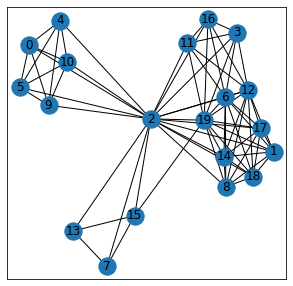


ACTION: 
Average number of edges:  96.286
Average number of nodes:  19.432
Average number of edges per nodes:  4.955022643062989
Average density:  0.4820124914266759
Number of isomorphic pairs:  916

Example graph for genre action


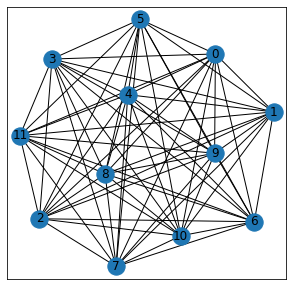

In [5]:
graphs_romance = imdb_networkx[0:500]
graphs_action = imdb_networkx[500:1001]

graph_analysis.getGraphDataByClass(imdb_networkx,'Entire Dataset')
print()

graph_analysis.getGraphDataByClass(graphs_romance,'ROMANCE')
print()
print('Example graph for genre romance')
visualize(graphs_romance[0])
print()

graph_analysis.getGraphDataByClass(graphs_action,'ACTION')
print()
print('Example graph for genre action')
visualize(graphs_action[0])



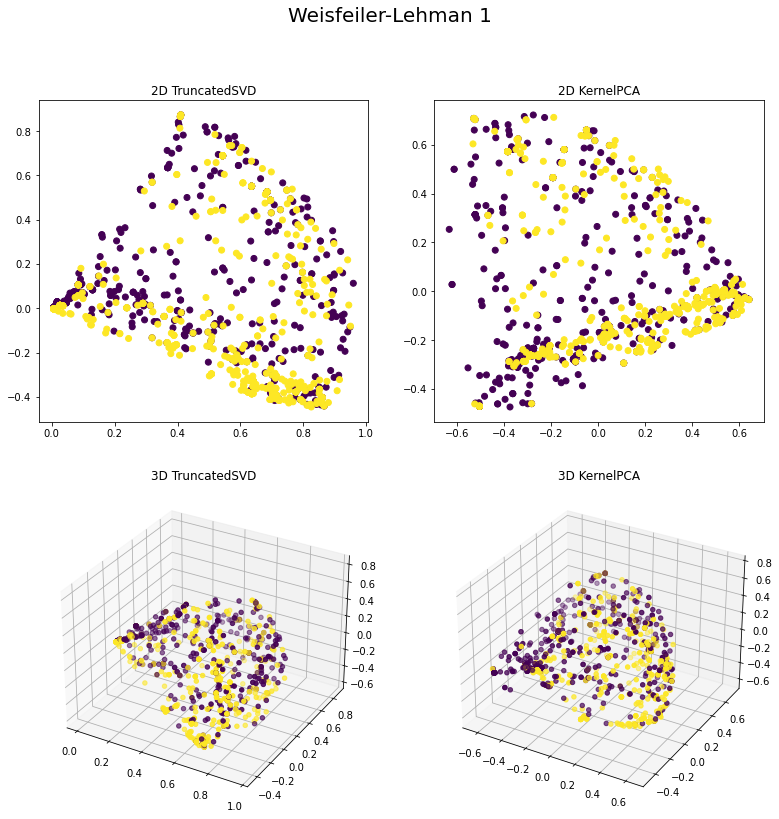

________________________________________________________________________________________


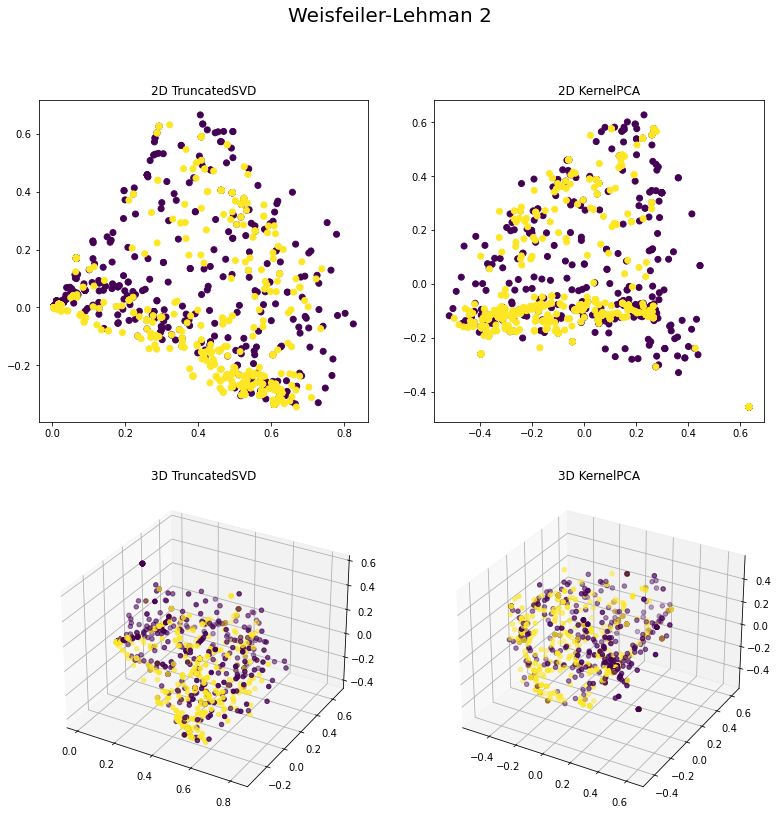

________________________________________________________________________________________


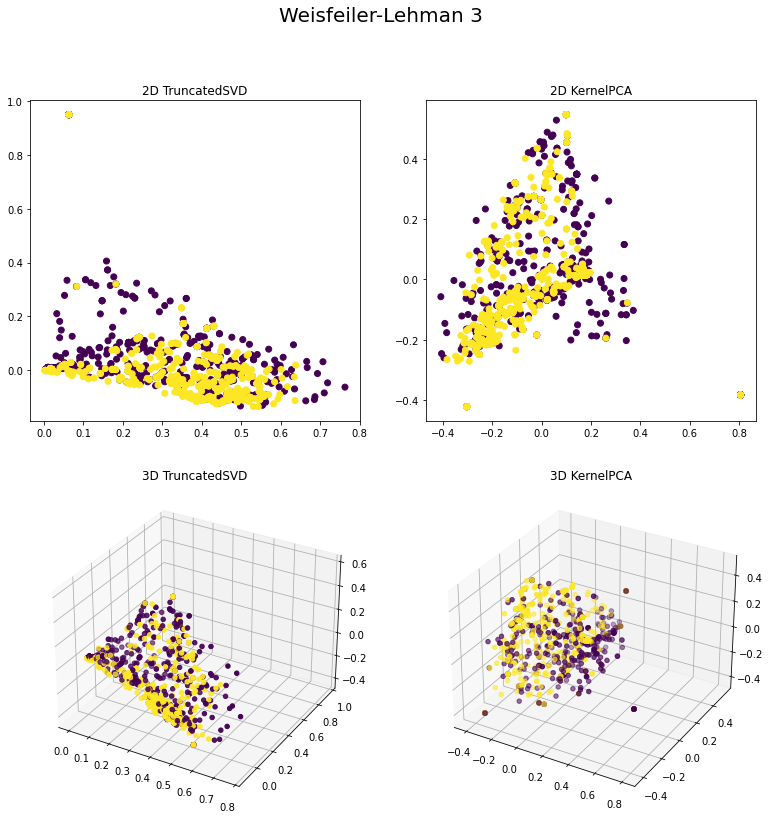

________________________________________________________________________________________


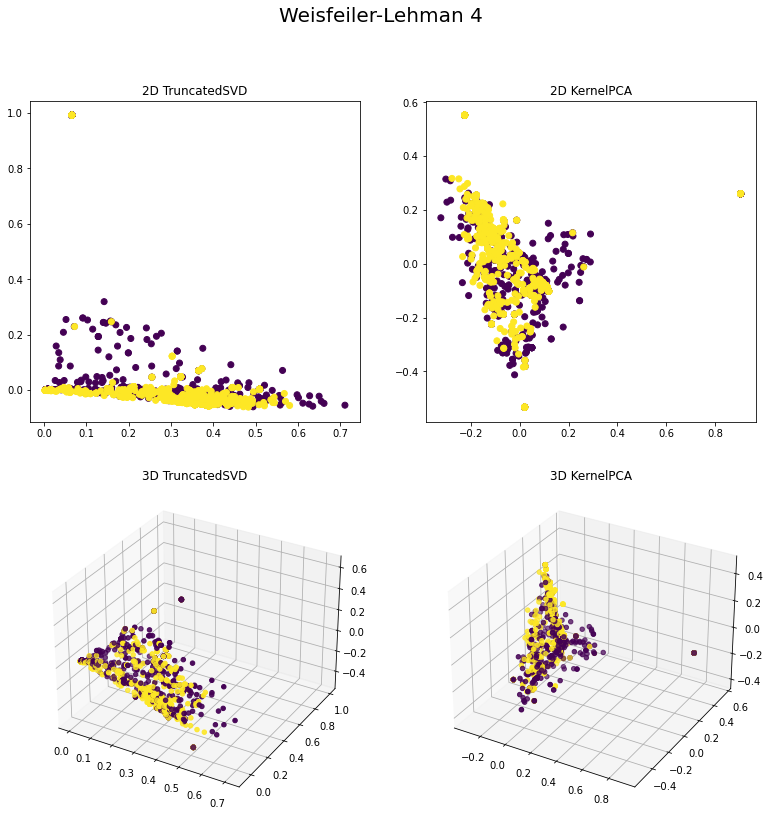

________________________________________________________________________________________


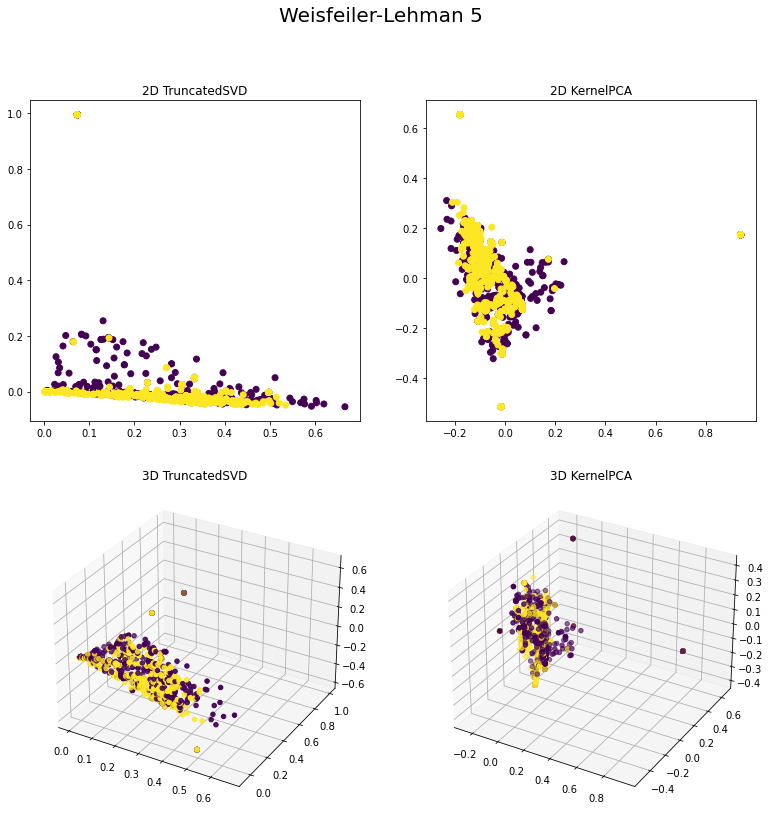

________________________________________________________________________________________


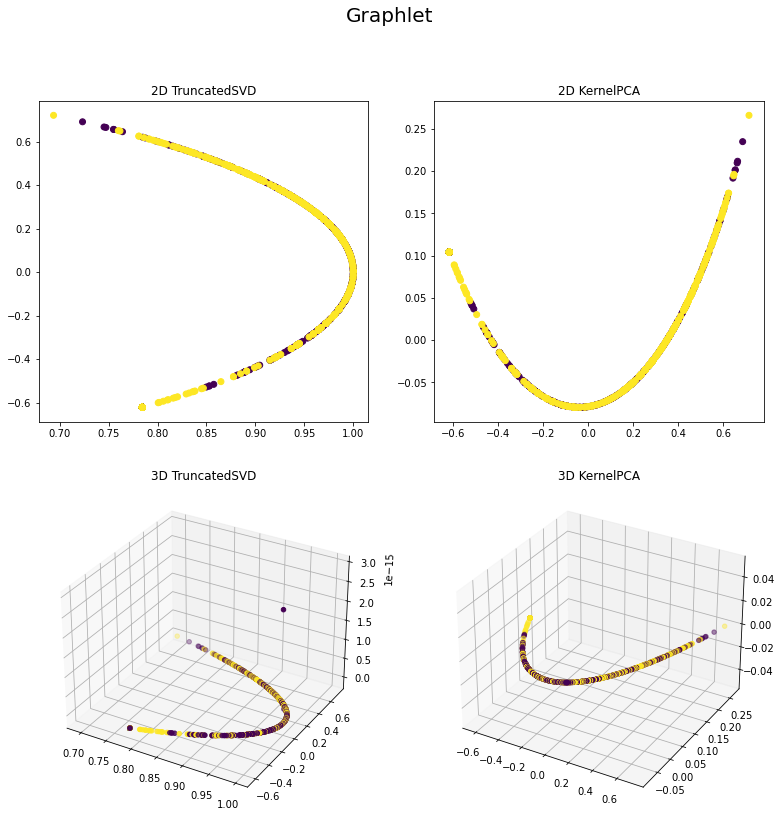

________________________________________________________________________________________


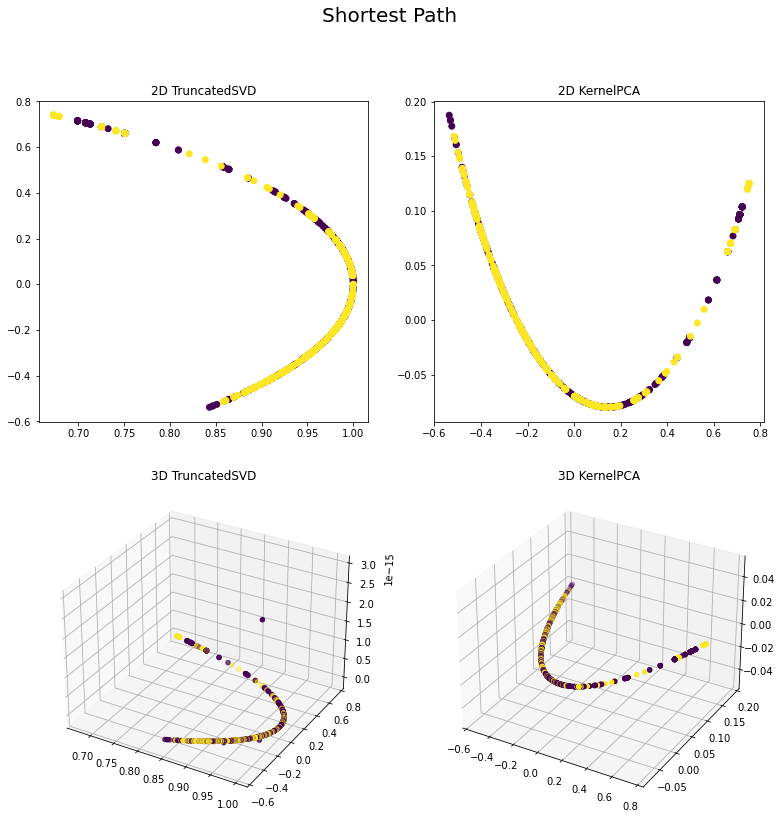

________________________________________________________________________________________


In [5]:
#DIMENSIONALITY REDUCTION/ Feature Engeneering
tsvd_wl1_vectors = dimensionality_reduction.truncatedSVD(imdb_wl1_vectors)
tsvd_wl2_vectors = dimensionality_reduction.truncatedSVD(imdb_wl2_vectors)
tsvd_wl3_vectors = dimensionality_reduction.truncatedSVD(imdb_wl3_vectors)
tsvd_wl4_vectors = dimensionality_reduction.truncatedSVD(imdb_wl4_vectors)
tsvd_wl5_vectors = dimensionality_reduction.truncatedSVD(imdb_wl5_vectors)
tsvd_graphlet_vectors = dimensionality_reduction.truncatedSVD(imdb_graphlet_vectors)
tsvd_shortestpath_vectors = dimensionality_reduction.truncatedSVD(imdb_shortestpath_vectors)

kpca_wl1_gram = dimensionality_reduction.kernelPCA(imdb_wl1_gram)
kpca_wl2_gram = dimensionality_reduction.kernelPCA(imdb_wl2_gram)
kpca_wl3_gram = dimensionality_reduction.kernelPCA(imdb_wl3_gram)
kpca_wl4_gram = dimensionality_reduction.kernelPCA(imdb_wl4_gram)
kpca_wl5_gram = dimensionality_reduction.kernelPCA(imdb_wl5_gram)
kpca_graphlet_gram = dimensionality_reduction.kernelPCA(imdb_graphlet_gram)
kpca_shortestpath_gram = dimensionality_reduction.kernelPCA(imdb_shortestpath_gram)
wl_list = [kpca_wl1_gram,kpca_wl2_gram,kpca_wl3_gram,kpca_wl4_gram,kpca_wl5_gram]
wl_list1 = [tsvd_wl1_vectors,tsvd_wl2_vectors,tsvd_wl3_vectors,tsvd_wl4_vectors,tsvd_wl5_vectors]
for i in range(1,8):
    if(i==6):
        data_tsvd = tsvd_graphlet_vectors
        data_kpca = kpca_graphlet_gram
    elif(i==7):
        data_tsvd = tsvd_shortestpath_vectors
        data_kpca = kpca_shortestpath_gram
    else:
        data_tsvd = wl_list1[i-1]
        data_kpca = wl_list[i-1]
    fig = plt.figure(figsize=(13,13))
    if(i==6):
        fig.suptitle('Graphlet',fontsize=20)
    elif(i==7):
        fig.suptitle('Shortest Path',fontsize=20)
    else:
        fig.suptitle(f'Weisfeiler-Lehman {i}',fontsize=20)
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223,projection='3d')
    ax4 = fig.add_subplot(224,projection='3d')
    ax1.title.set_text('2D TruncatedSVD')
    ax2.title.set_text('2D KernelPCA')
    ax3.title.set_text('3D TruncatedSVD')
    ax4.title.set_text('3D KernelPCA')
    ax1.scatter(data_tsvd[:,0],data_tsvd[:,1],c=classes)
    ax2.scatter(data_kpca[:,0],data_kpca[:,1],c=classes)
    ax3.scatter3D(data_tsvd[:,0],data_tsvd[:,1],data_tsvd[:,2],c=classes)
    ax4.scatter3D(data_kpca[:,0],data_kpca[:,1],data_kpca[:,2],c=classes)
    plt.show()
    print("________________________________________________________________________________________")

245


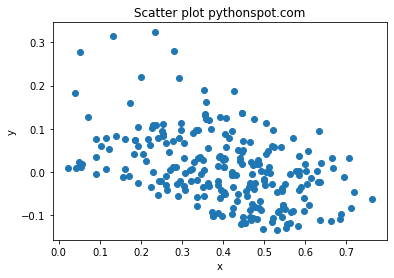

In [7]:
#OUTLIER DETECTION
test = outlier_detection.pandas_outlier_detection(tsvd_wl3_vectors)
print(len(test))
plt.scatter(test[:,0],test[:,1])
plt.title('Scatter plot pythonspot.com')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

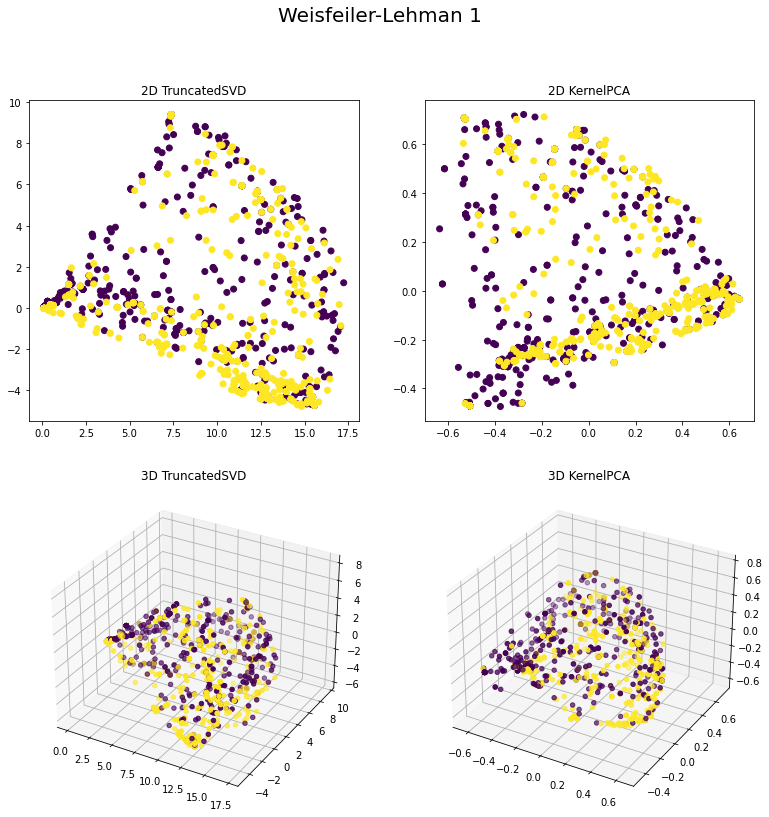

________________________________________________________________________________________


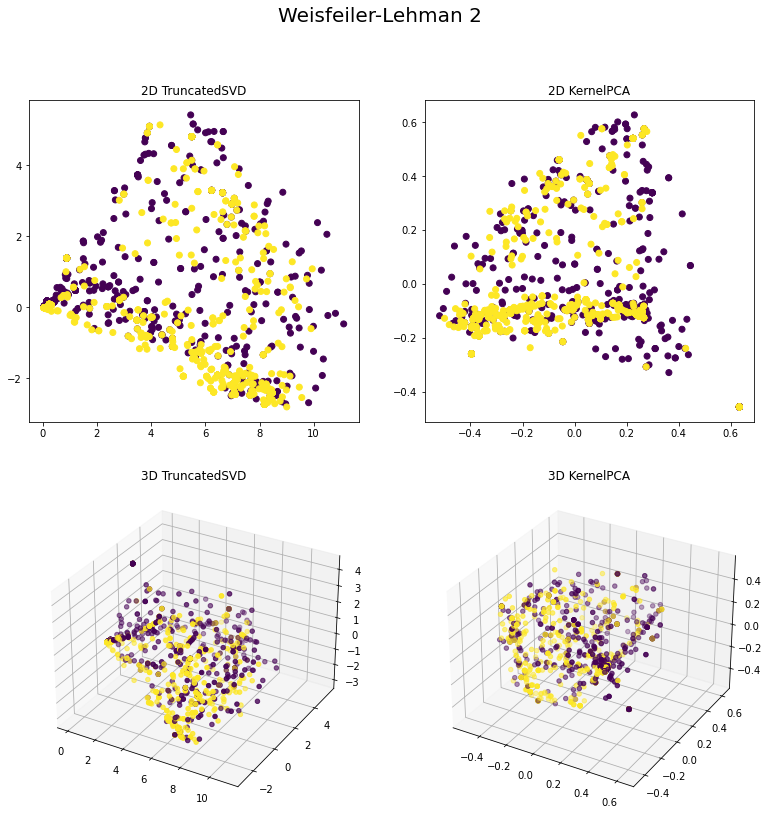

________________________________________________________________________________________


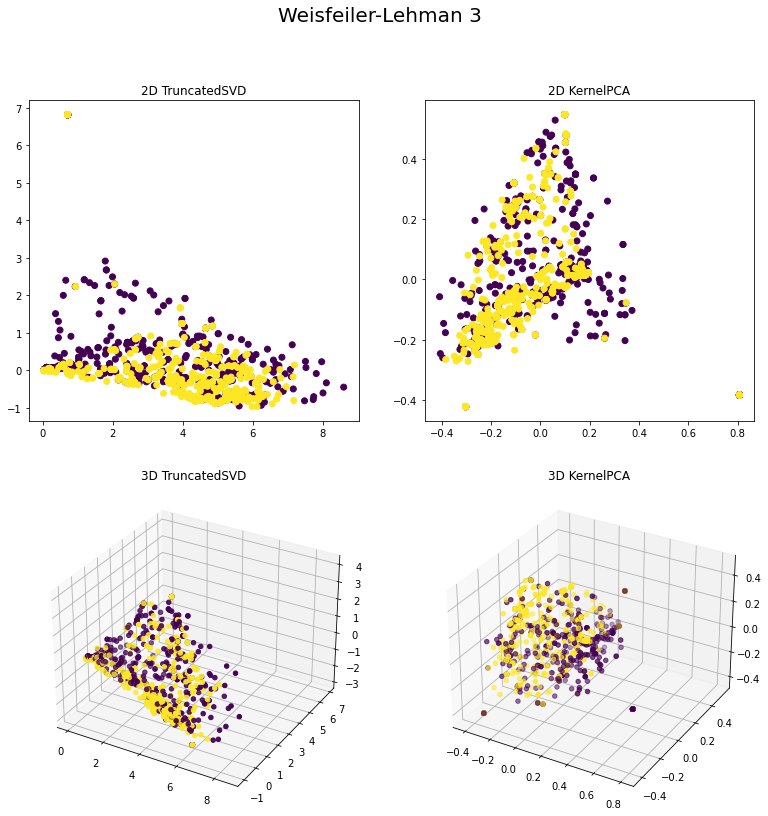

________________________________________________________________________________________


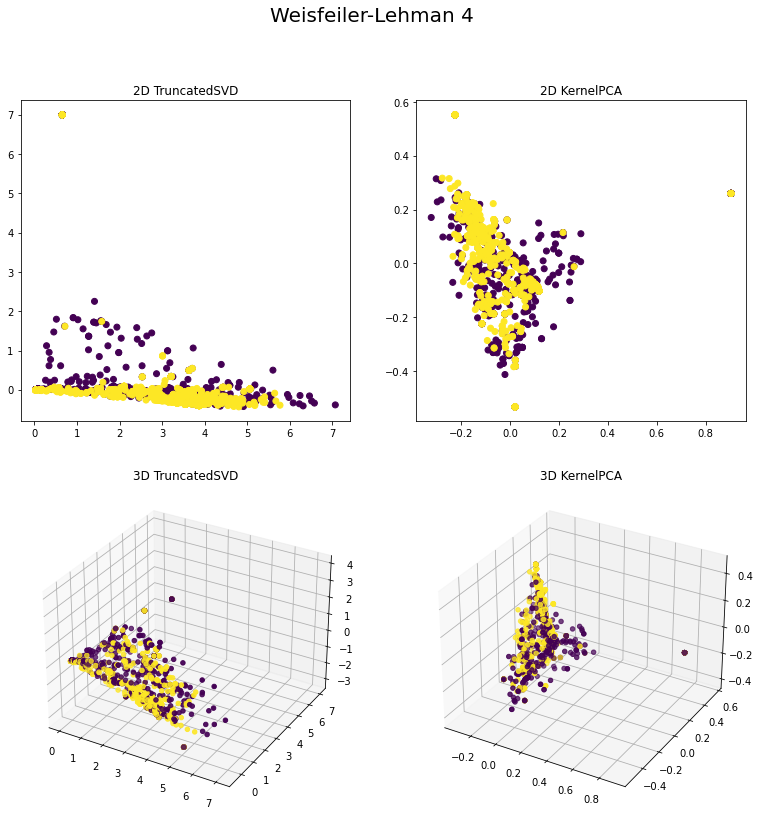

________________________________________________________________________________________


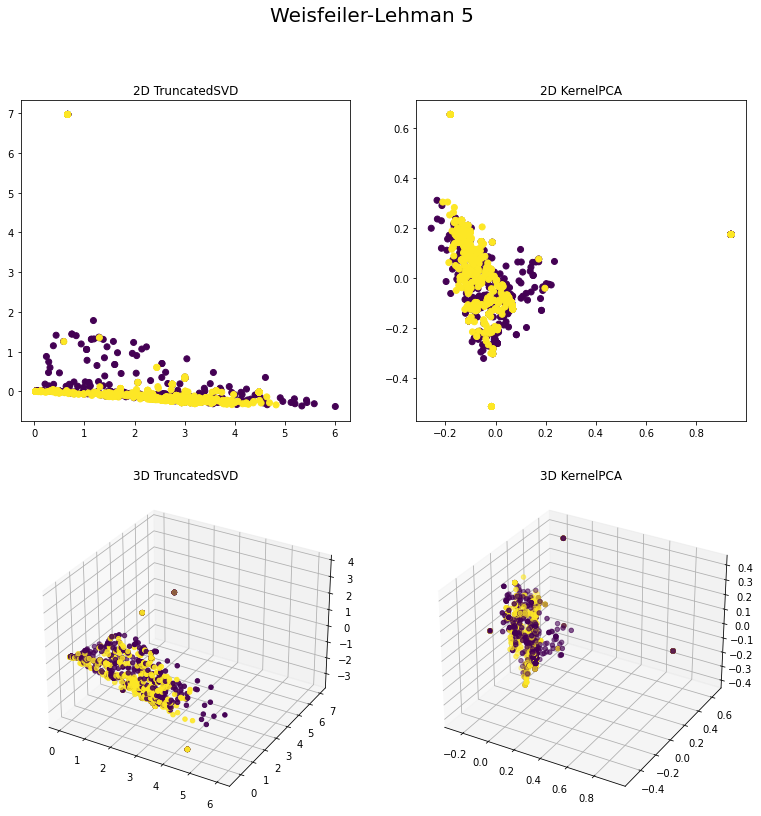

________________________________________________________________________________________


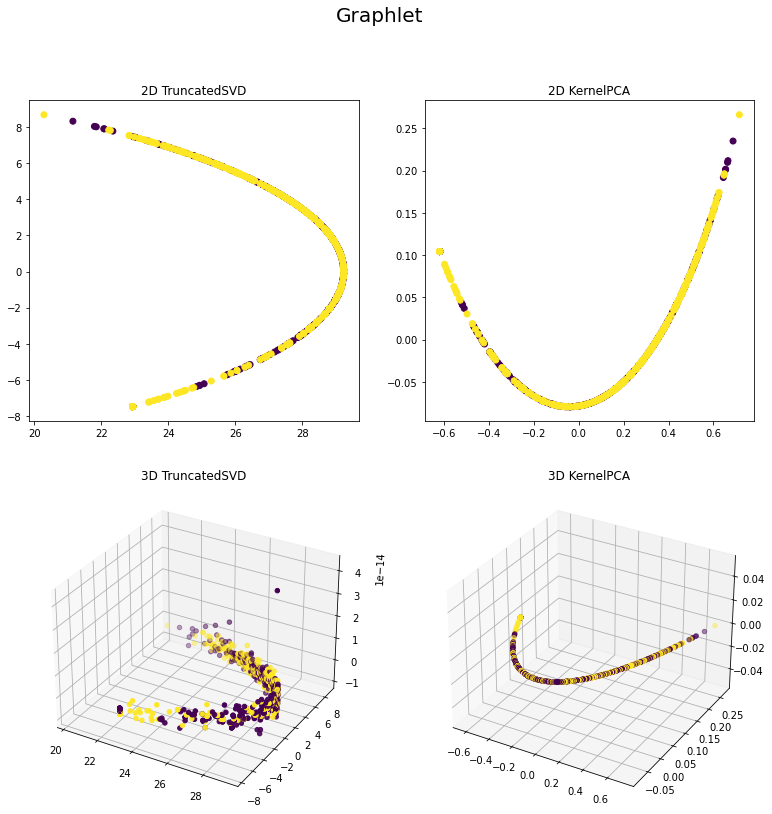

________________________________________________________________________________________


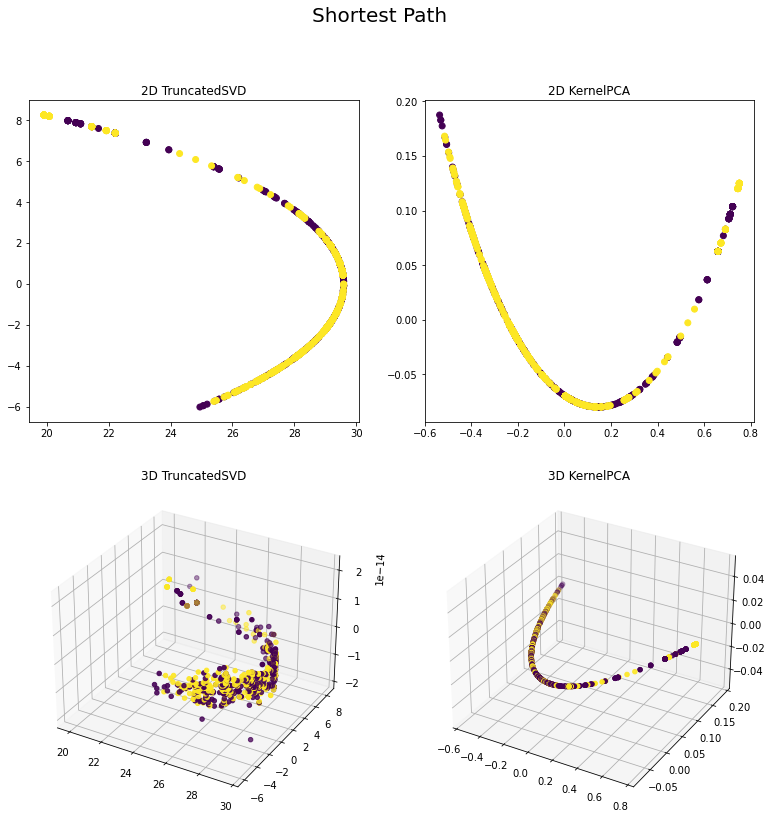

________________________________________________________________________________________


In [6]:
for i in range(1,8):
    if(i==6):
        gram_wl = load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_graphlet.csv")
    elif(i==7):
        gram_wl = load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_shortestpath.csv")
    else:
        gram_wl = load_csv(f"../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl{i}.csv")
    gram_wl = aux.normalize_gram_matrix(gram_wl)
    data_wl_svd = dimensionality_reduction.truncatedSVD(gram_wl)
    data_wl_kpca = dimensionality_reduction.kernelPCA(gram_wl)
    fig = plt.figure(figsize=(13,13))
    if(i==6):
        fig.suptitle('Graphlet',fontsize=20)
    elif(i==7):
        fig.suptitle('Shortest Path',fontsize=20)
    else:
        fig.suptitle(f'Weisfeiler-Lehman {i}',fontsize=20)
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223,projection='3d')
    ax4 = fig.add_subplot(224,projection='3d')
    ax1.title.set_text('2D TruncatedSVD')
    ax2.title.set_text('2D KernelPCA')
    ax3.title.set_text('3D TruncatedSVD')
    ax4.title.set_text('3D KernelPCA')
    ax1.scatter(data_wl_svd[:,0],data_wl_svd[:,1],c=classes)
    ax2.scatter(data_wl_kpca[:,0],data_wl_kpca[:,1],c=classes)
    ax3.scatter3D(data_wl_svd[:,0],data_wl_svd[:,1],data_wl_svd[:,2],c=classes)
    ax4.scatter3D(data_wl_kpca[:,0],data_wl_kpca[:,1],data_wl_kpca[:,2],c=classes)
    plt.show()
    print("________________________________________________________________________________________")


Was fällt auf ? 
Wl1 ist im Vergleich zu WL2-5 90° rotiert. Außerdem wird mit zunehmender Weisfeiler-lemann Iteration die Variation der Datenpunkte entlang der x bzw. y-Achse kleiner. 

Number of graphs in data set is 1000


The average number of nodes in the IMDB-BINARY dataset is:   19.773


The average number of edges in the IMDB-BINARY dataset is:   96.531
The average number of edges per node in the IMDB-BINARY dataset is:   4.8819602488241545
The average density in the IMDB-BINARY dataset is:   0.5206179238965227


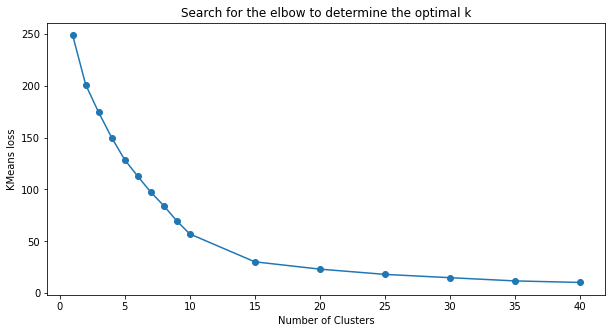

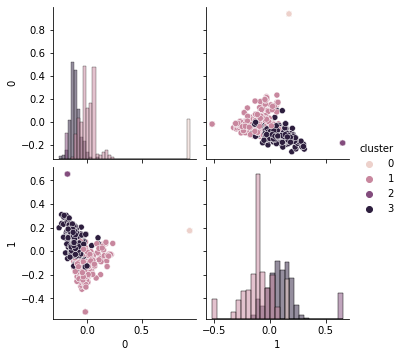

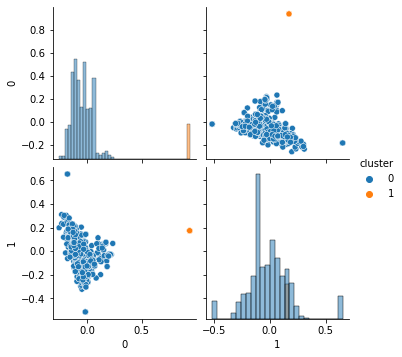

In [5]:
gram_wl = load_csv("../../graph_representations/without_labels/IMDB-BINARY_gram_matrix_wl5.csv")
gram_wl = aux.normalize_gram_matrix(gram_wl) 
kpca = visualisation.kernelPCA(gram_wl,classes,'test')
clustering.kMeans_scree_plot(kpca)